# Smart Manufacturing

![Screenshot](images/throughput_time.JPG) 

Scenario: We have been given data from a spare parts manufacturing plant that uses Fabricating Machines, and skilled Operators to produce spare parts. These are small parts and they are produced in the 100's. The manufacturing plant wants to produce as many parts as possible quickly.

**Data:** We have given given 1 day's manufacturing data. There are 2 Machines (M1 and M2) and 5 human operators (O1...O5) and on this day 3 parts (P1, P2 and P3) were produced.

Both M1 and M2 have different rates of production, when they are running. However, they both require some set-up time, as well as `change over` time when switching between different parts. 

__Stoppages__ Throughout the day, these machines get stopped for various reasons. These NPT (non-productive times) are due to the following reasons:
1. Alarms (machine parts overheating, high vibrations)
2. Operator stops (humans stopping the machines, for taking a break, replacing raw etc.)
3. Change over (when switching from one Part to manufacturing another)



**Goal for this lesson**: Compare the throughputs of the different machines, compare part manufacturing difficulty and operator efficiencies, by looking at the data


![Screenshot](images/CumulativeFlow.png) 

### Preparatory Tasks

1. Read the input file
2. Format the data into a proper time series (with datetime) Timestamps and floats for the sensor values
3. Plot the number of parts produced with time as the x-axis (flat areas are stoppage times)

## Questions to be answered

- Q1: How does Machine M1 compare against M2 in terms of its production capacity?
- Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?
- Q3: How do the 5 operators compare, in terms of their individual production rates?
- Q4: What is the actual `realized` production rate, when taking into account all the stoppages?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import os
import datetime

In [2]:
%matplotlib inline

In [3]:
# Reading the input file
data = pd.read_csv('smart_manufacturing_operator_machine_data.csv',sep=',')

# Formatting the data into a proper time series (with datetime).
# For this data, I am assuming a reference date of '1st December, 2019' for this assignment
data['Time'] = pd.to_timedelta(data['Time'])
data['Time'] = data['Time'][:]+pd.Timestamp('2019-12-01')

# I will be keeping the datatype of the 'NumberOfPieces' column as 'integer' and not 'float' since this is more applicable for what it contains

data.head()

,Time,StopType,Operator,Part,NumberOfPieces,Machine
0,2019-12-01 00:07:29.798441,Run,Op_2,P1,12483,M2
1,2019-12-01 00:09:55.991285,Run,Op_1,P1,18988,M1
2,2019-12-01 00:10:46.491958,Run,Op_1,P1,1793,M1
3,2019-12-01 00:17:12.460362,ChangeOver,Op_1,P3,0,M1
4,2019-12-01 00:21:34.147366,OpStop,Op_2,P1,0,M2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 6 columns):
Time              364 non-null datetime64[ns]
StopType          364 non-null object
Operator          364 non-null object
Part              364 non-null object
NumberOfPieces    364 non-null int64
Machine           364 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 17.2+ KB


### Preliminary Visualization of the Data

/home/cchukwuedo/anaconda3/envs/appdev/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


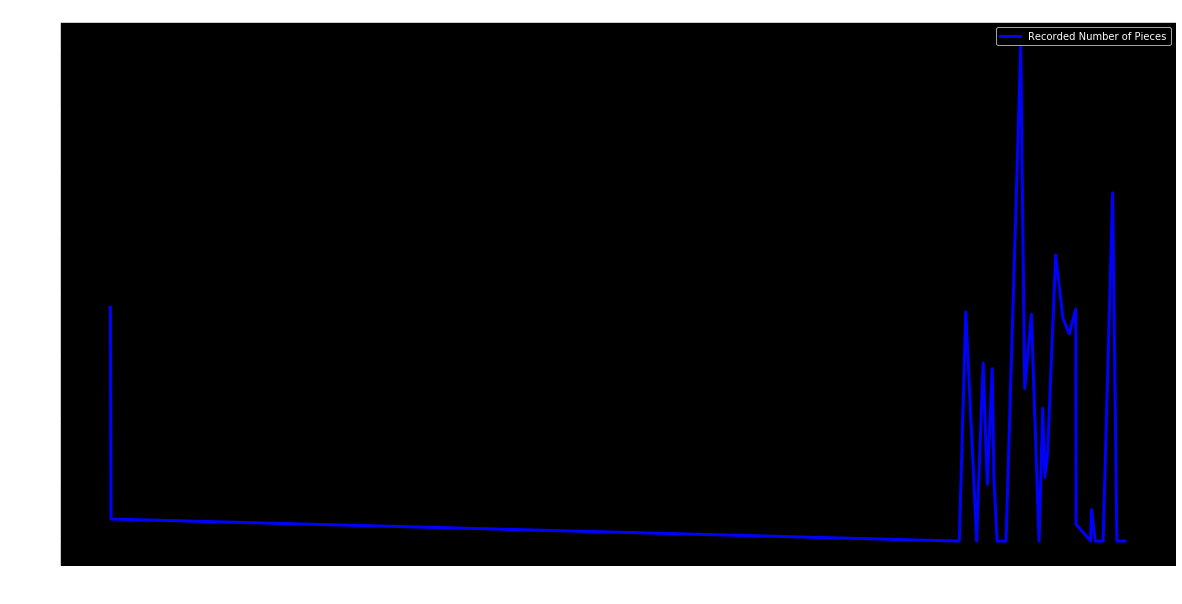

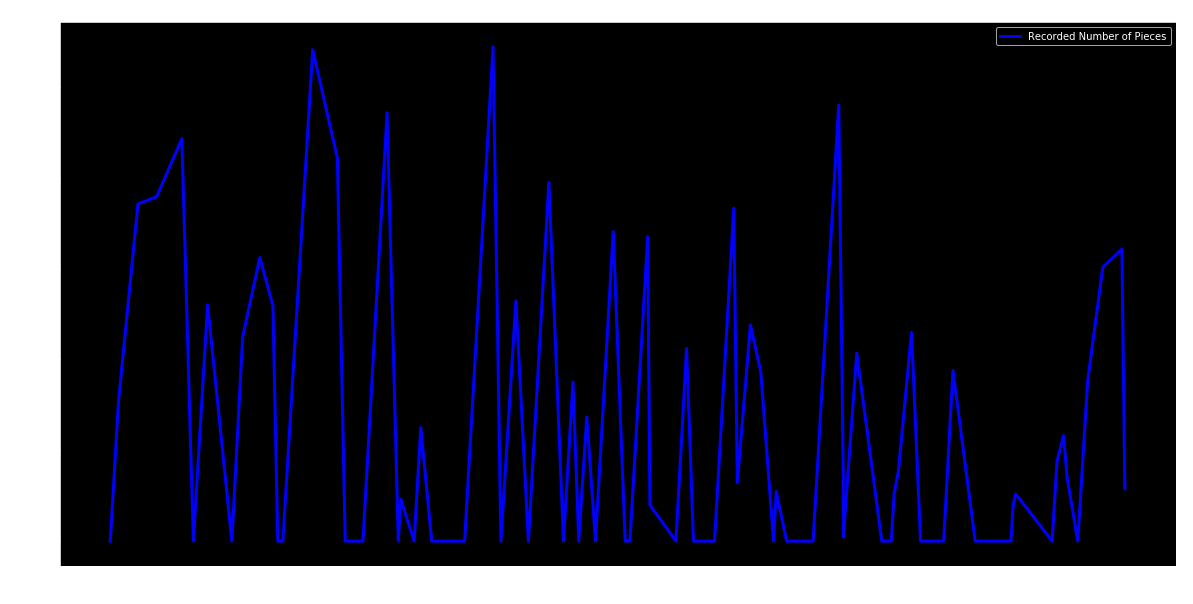

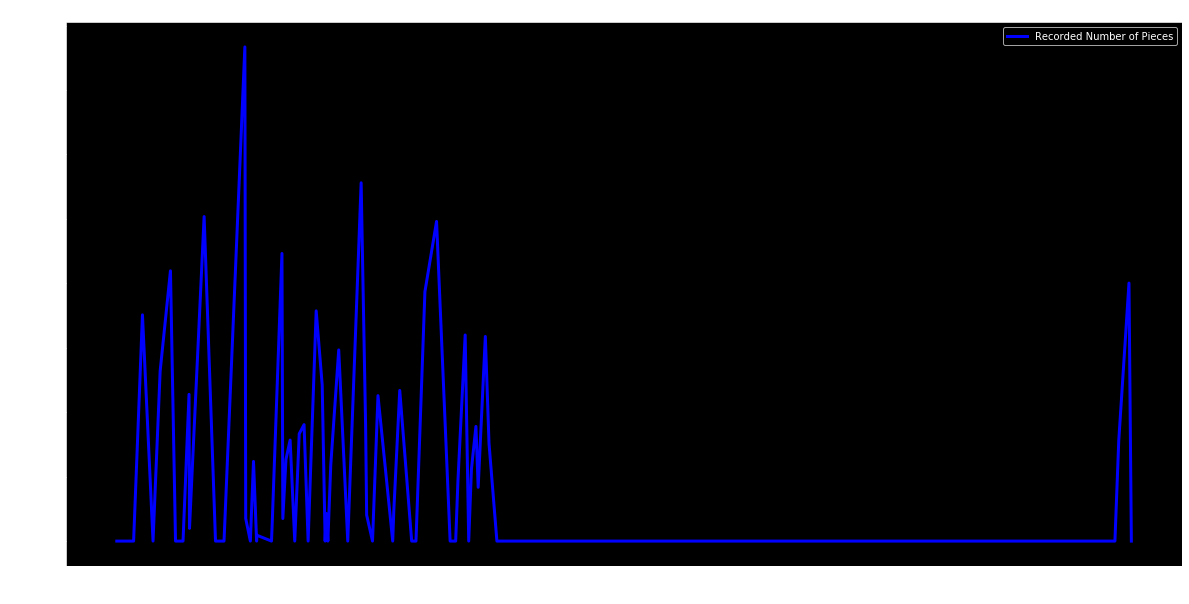

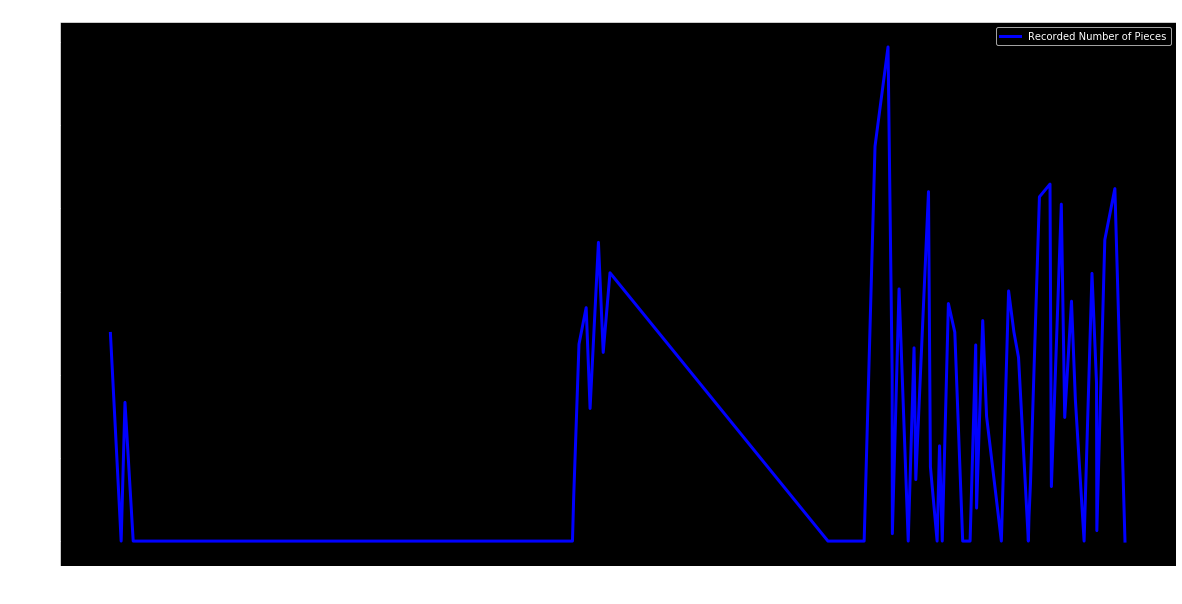

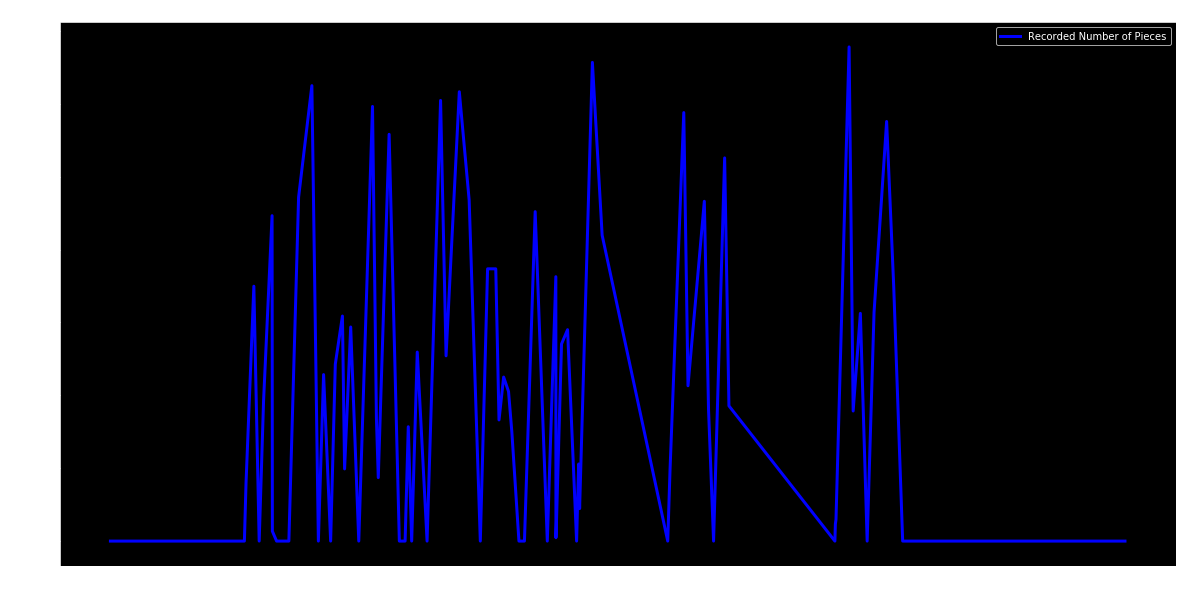

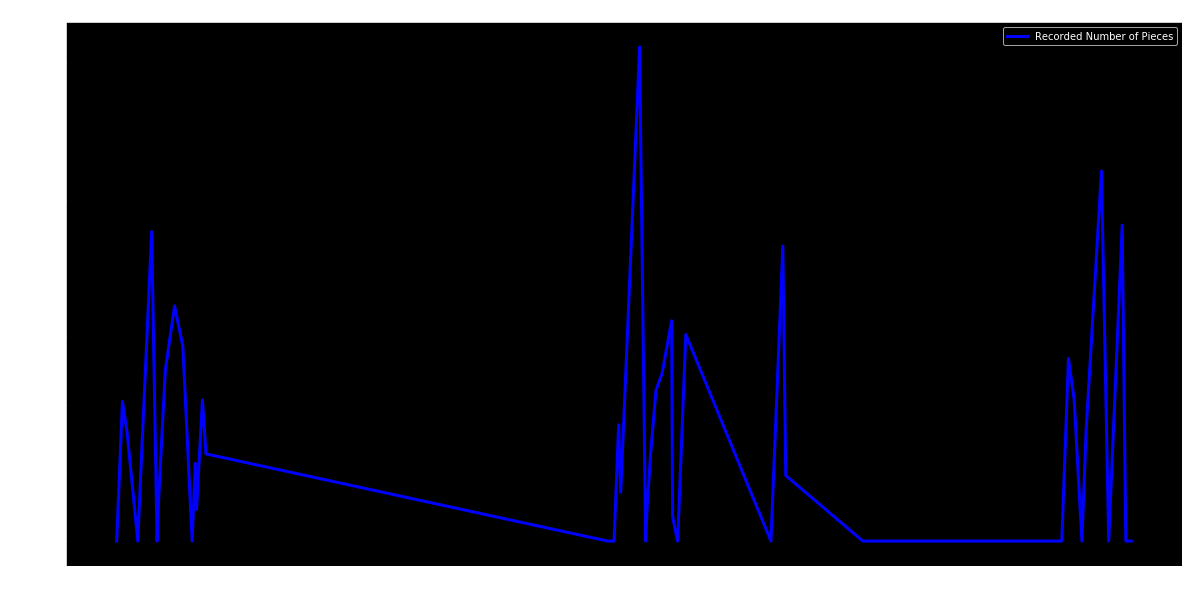

In [5]:
for m in ('M1', 'M2'):
    for a in ('P1', 'P2', 'P3'):
        plt.figure(figsize=(20, 10))
        plt.plot(data['Time'][(data['Machine']==m)][(data['Part']==a)], data['NumberOfPieces'][(data['Machine']==m)][(data['Part']==a)], linewidth=3, linestyle="-", color="blue", label=r"Recorded Number of Pieces")
        plt.xlabel(r"Timestamp")
        plt.ylabel(r"Number of Pieces")
        plt.title(f"Number of pieces for part {a} produced by machine {m} over a 1-day period")
        plt.legend(loc="upper right")
   

/home/cchukwuedo/anaconda3/envs/appdev/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


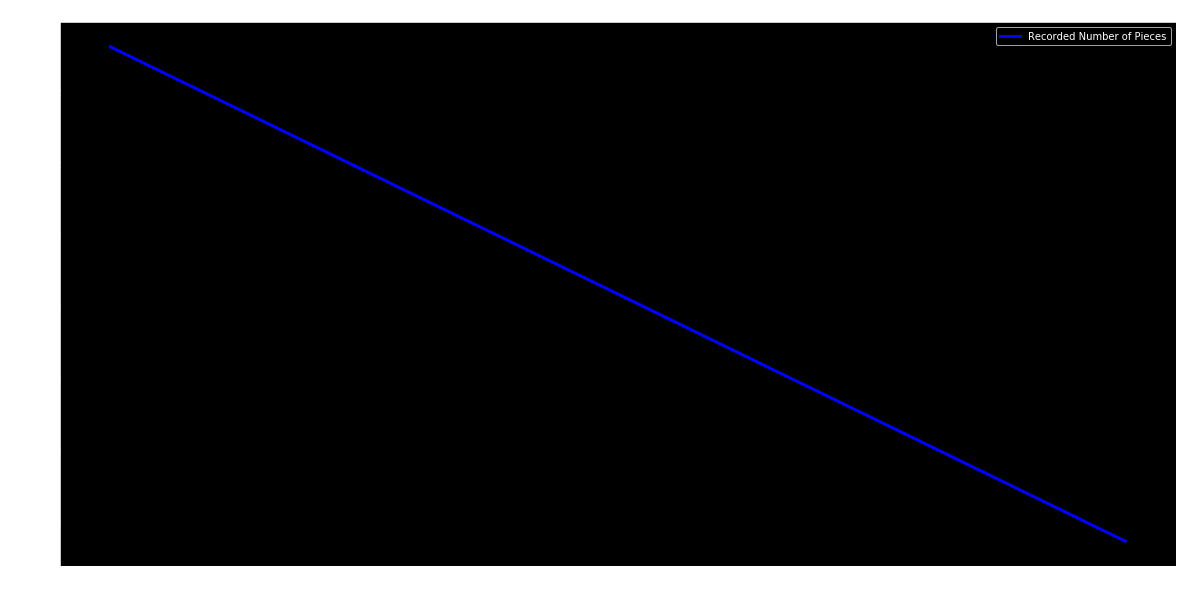

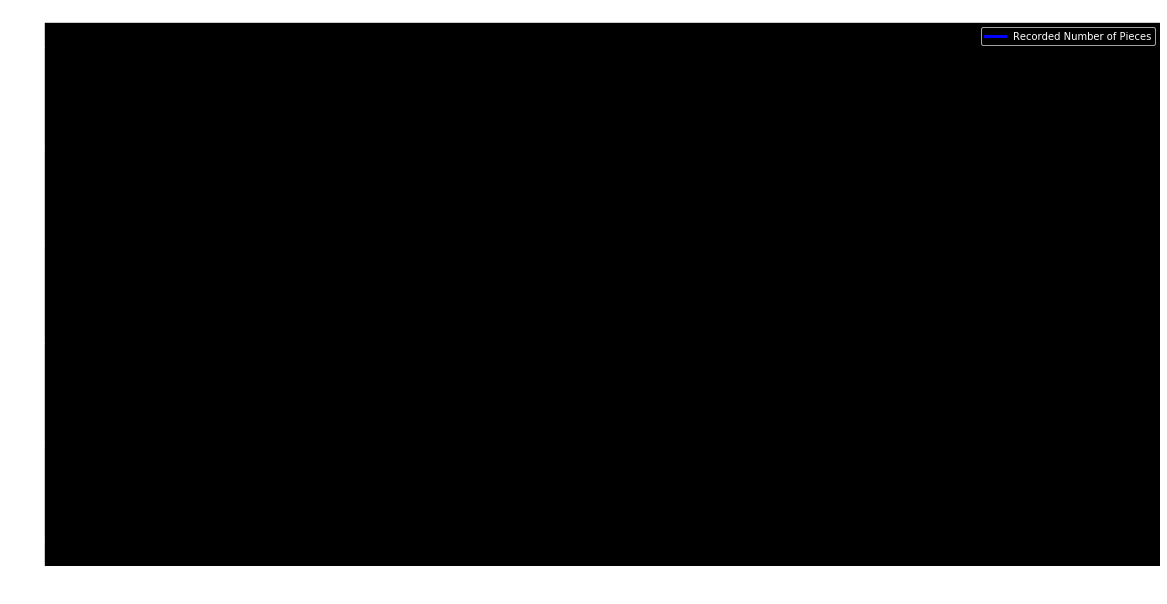

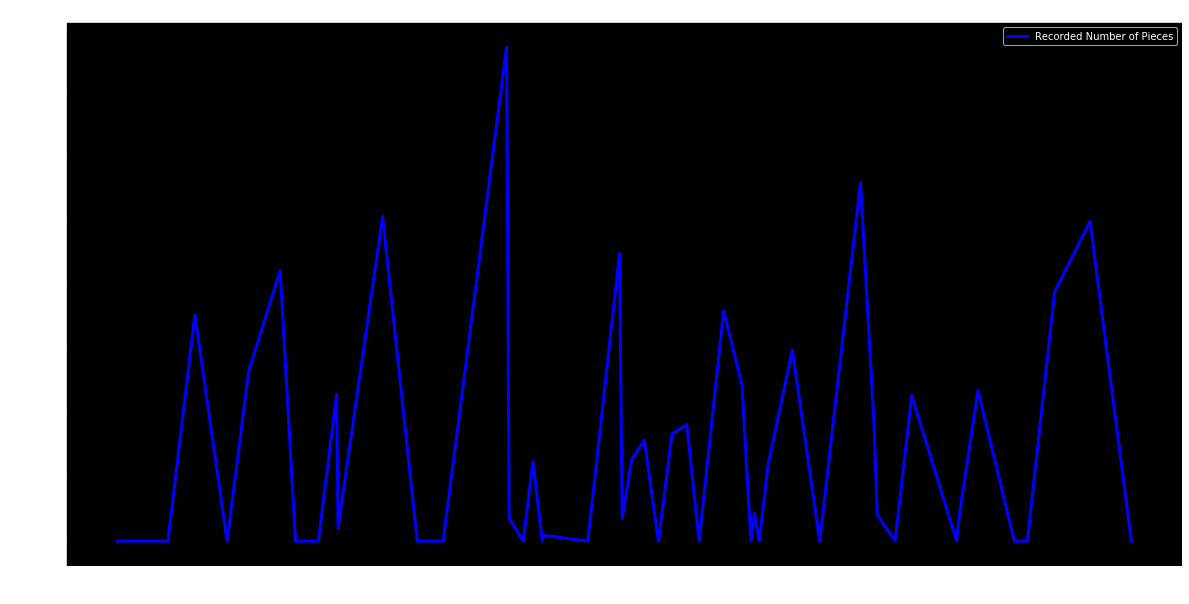

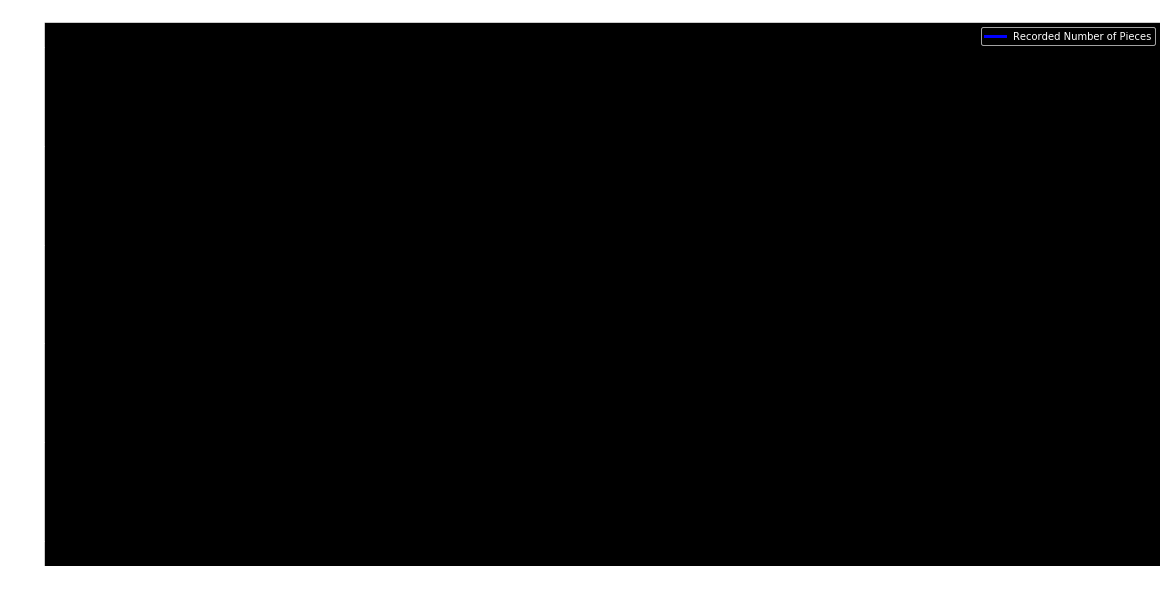

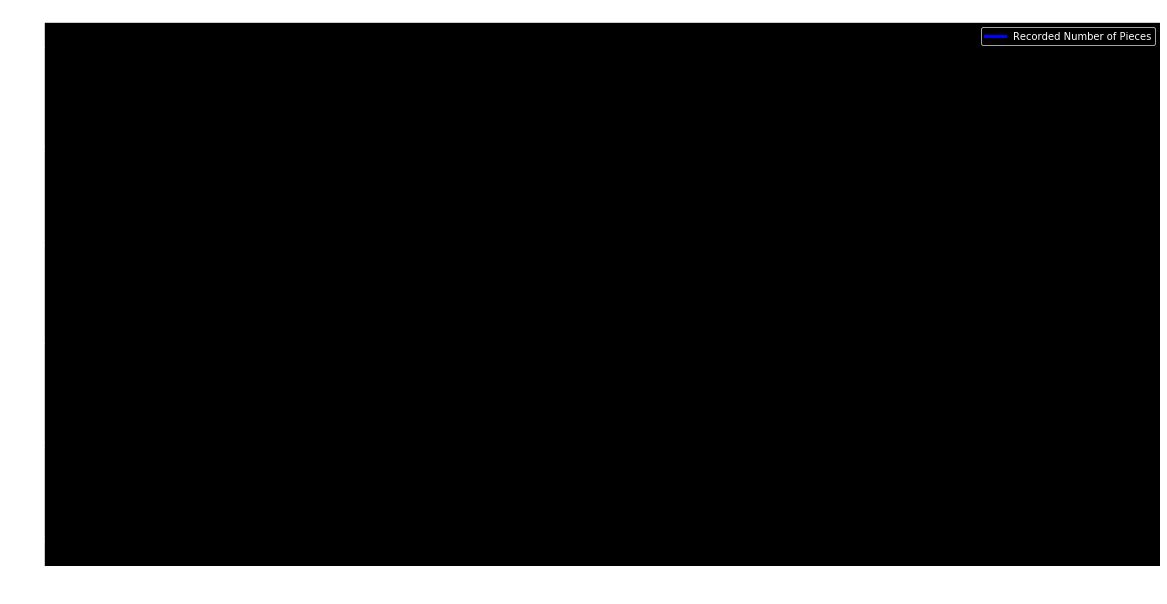

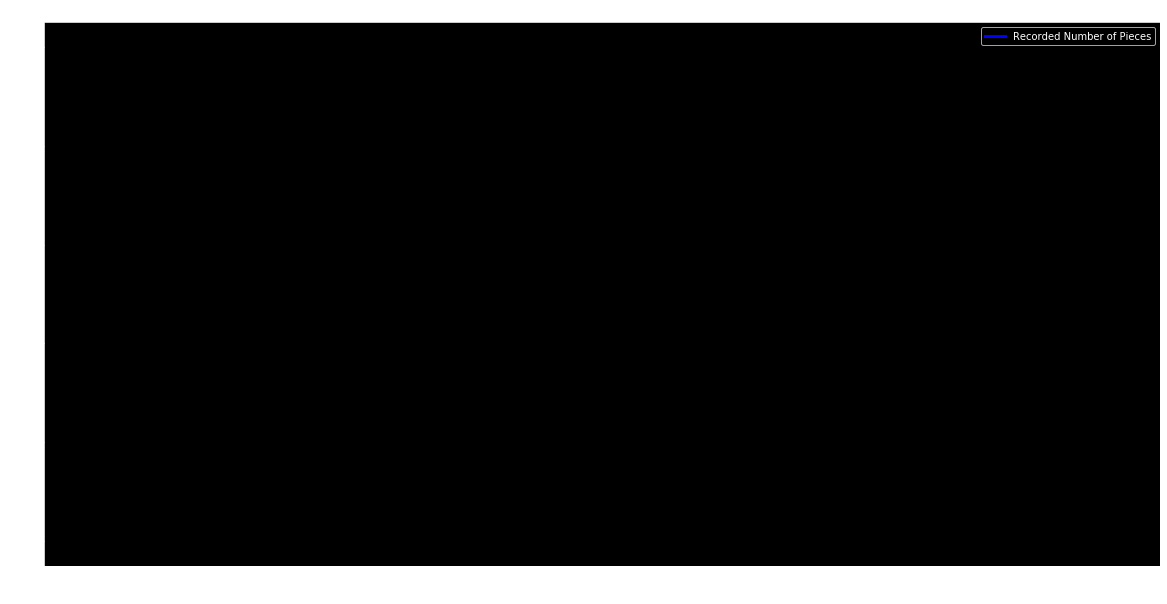

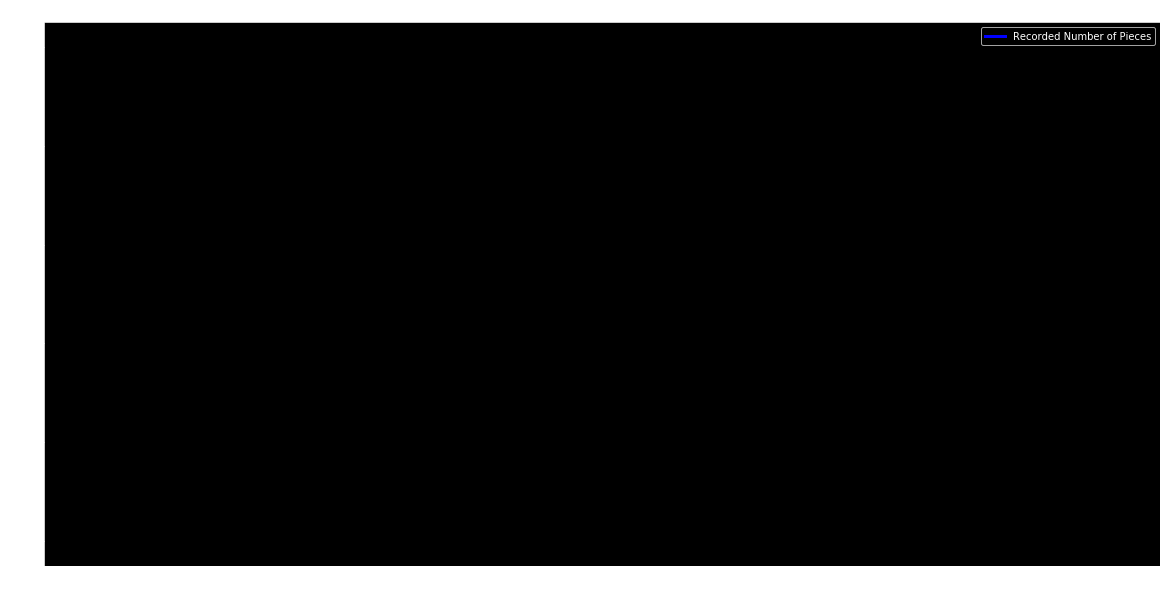

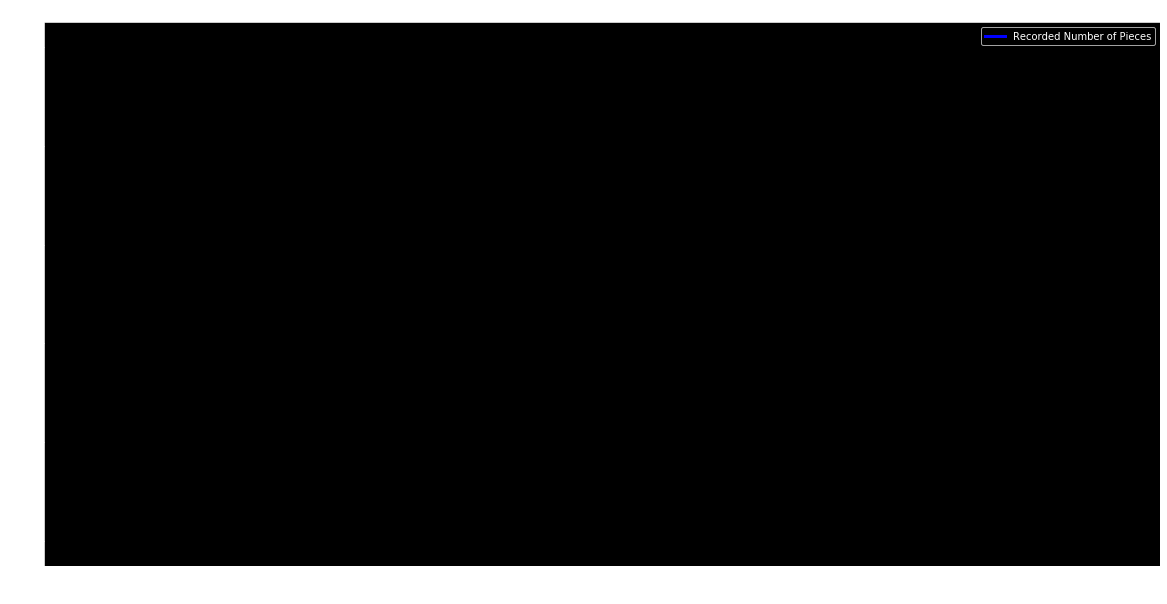

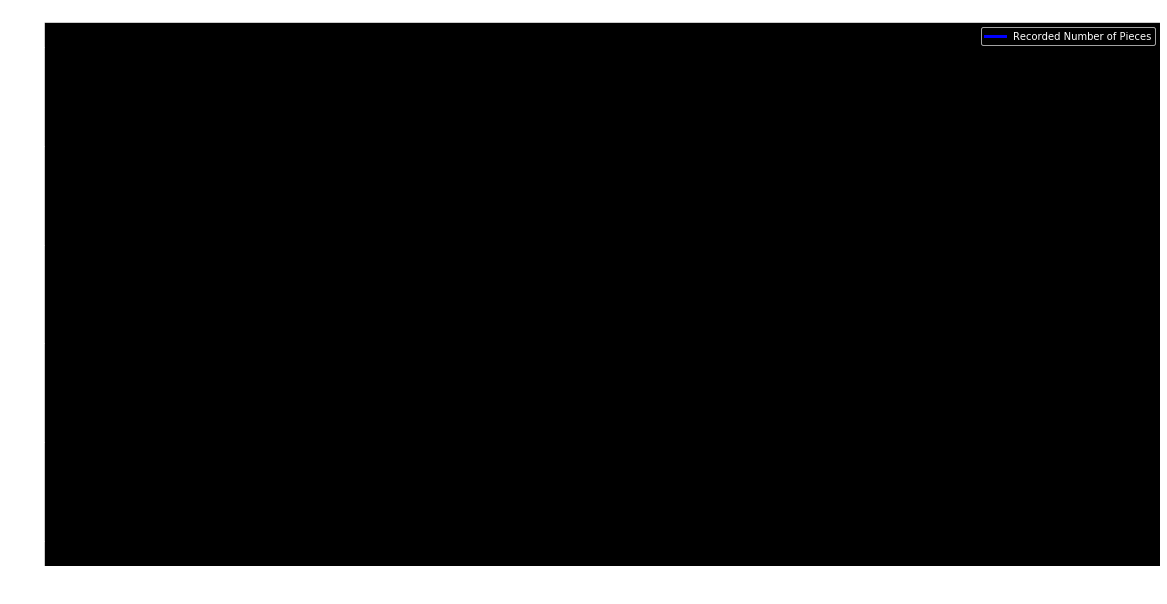

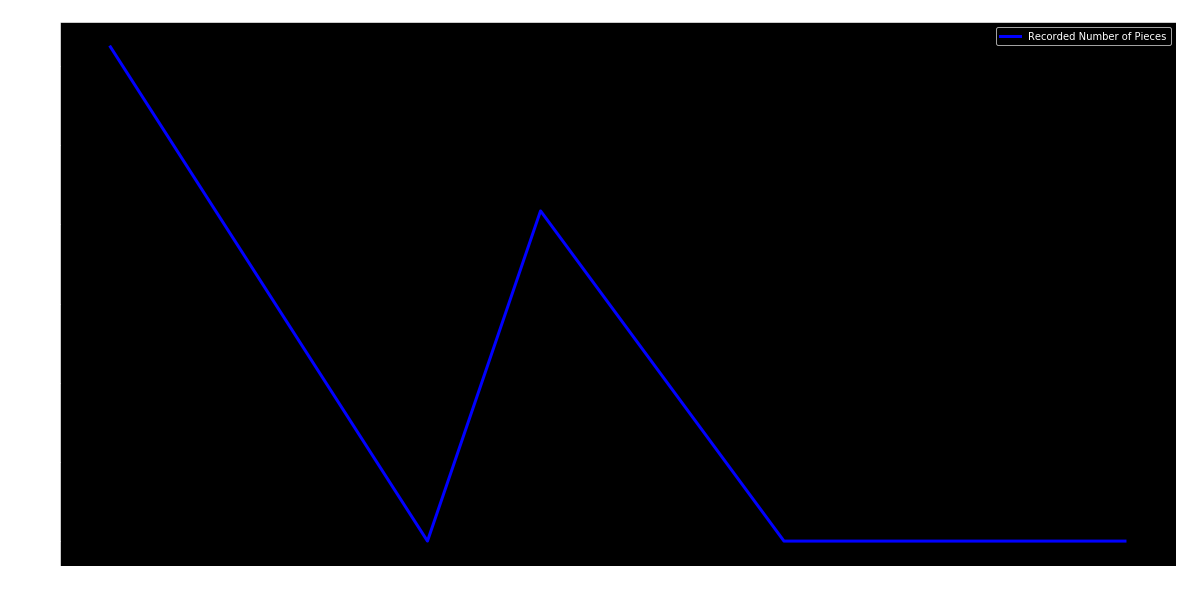

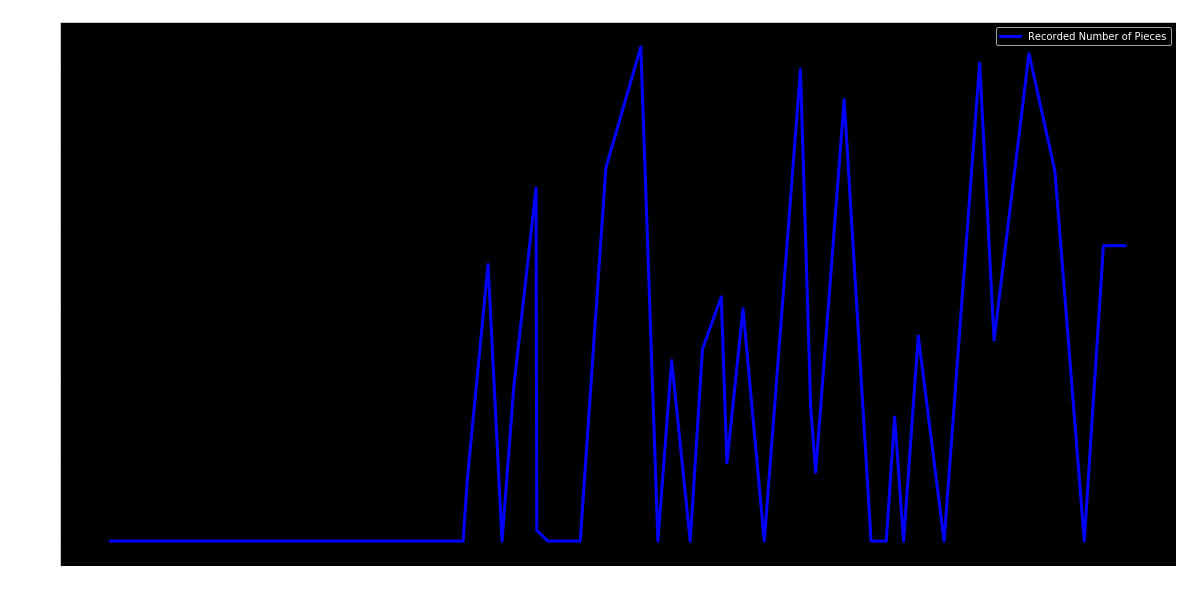

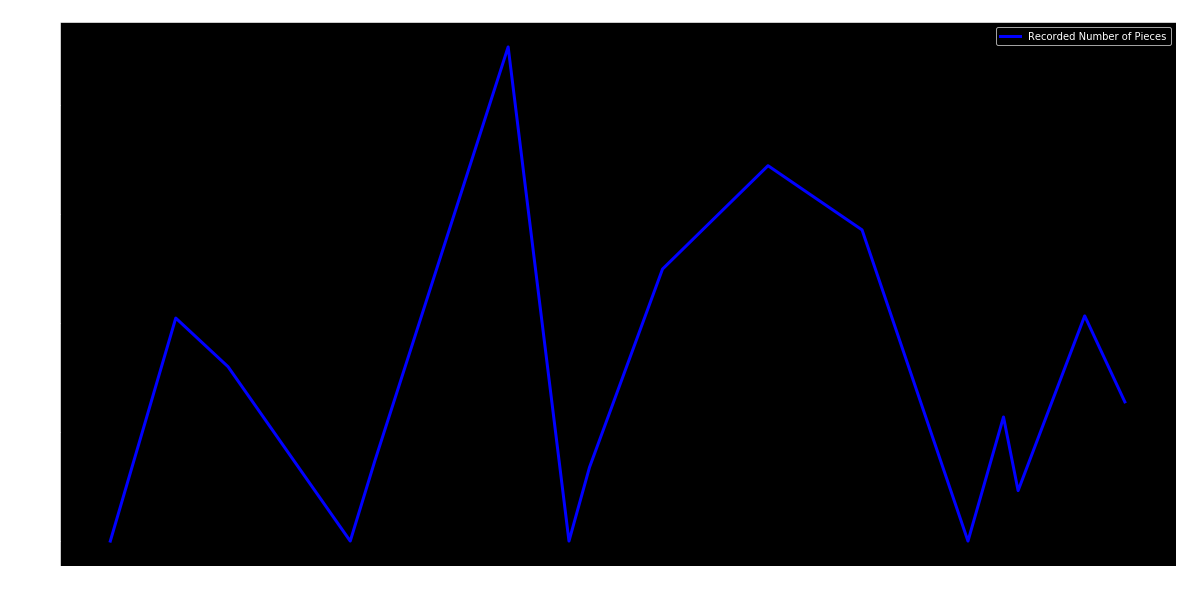

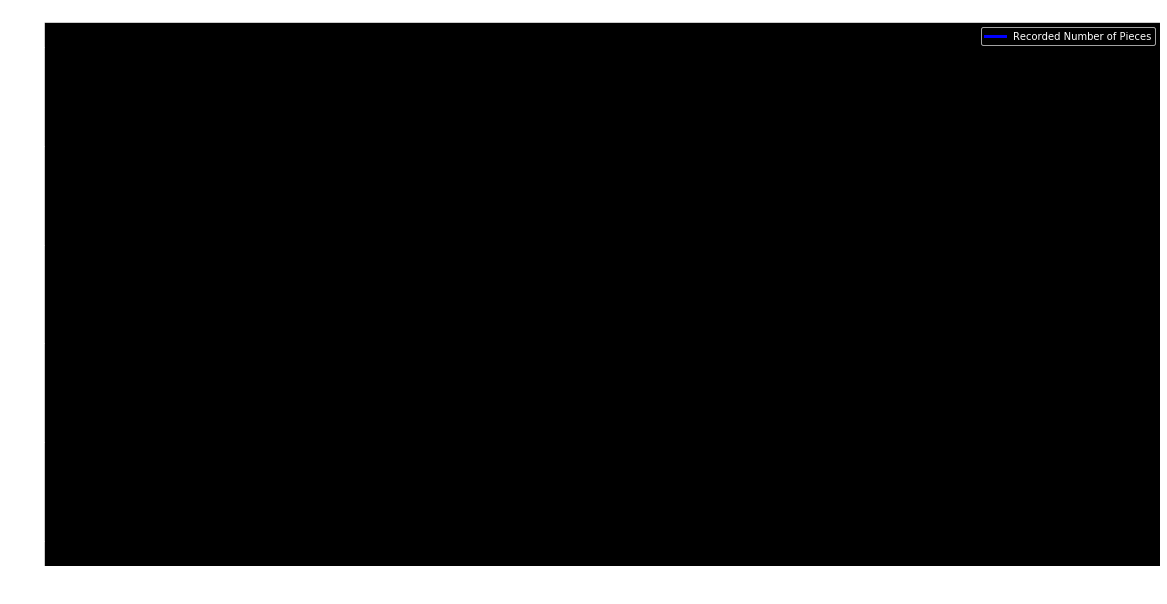

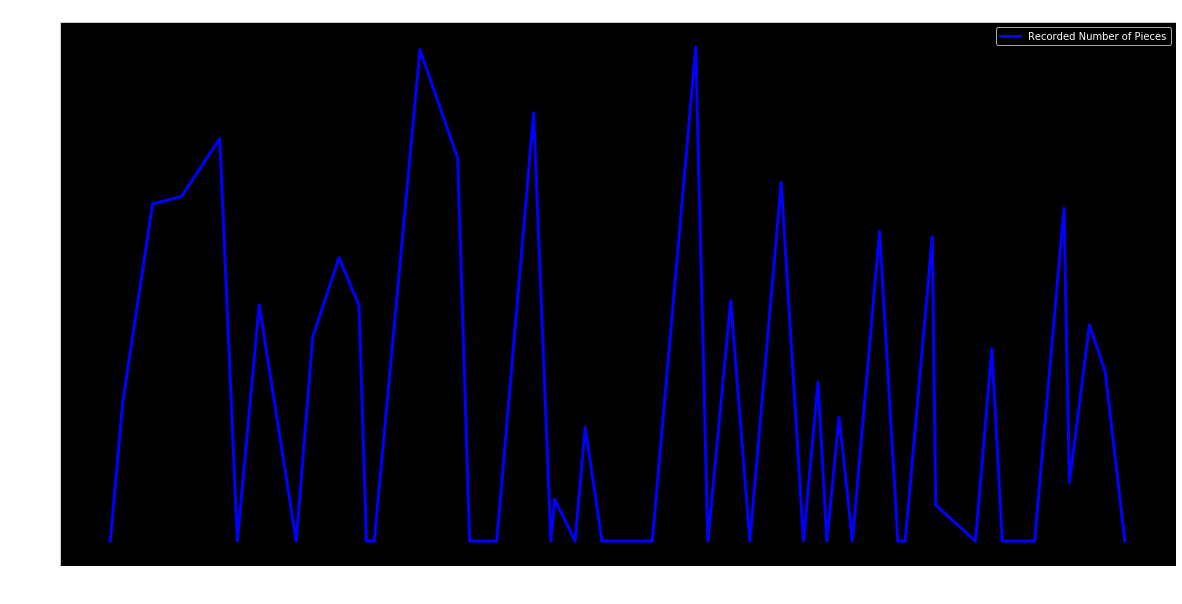

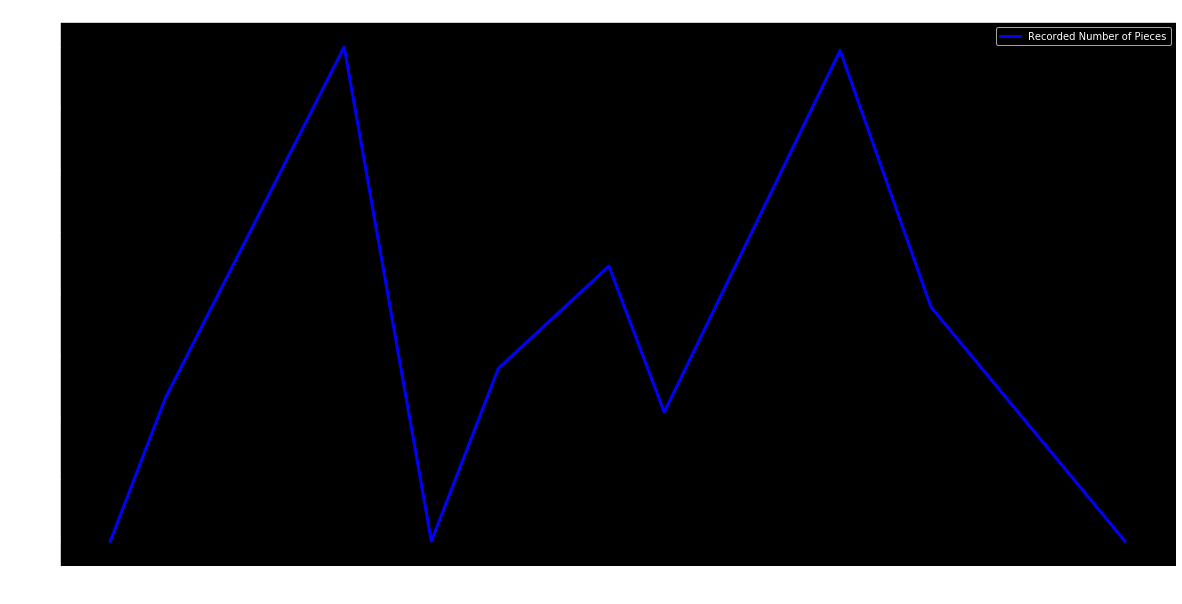

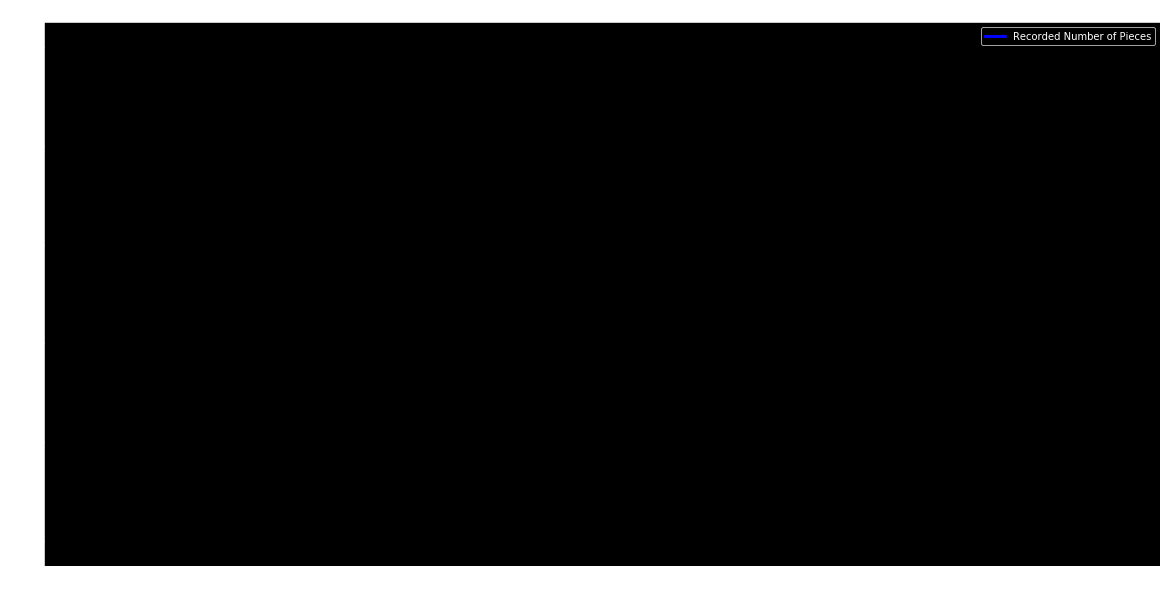

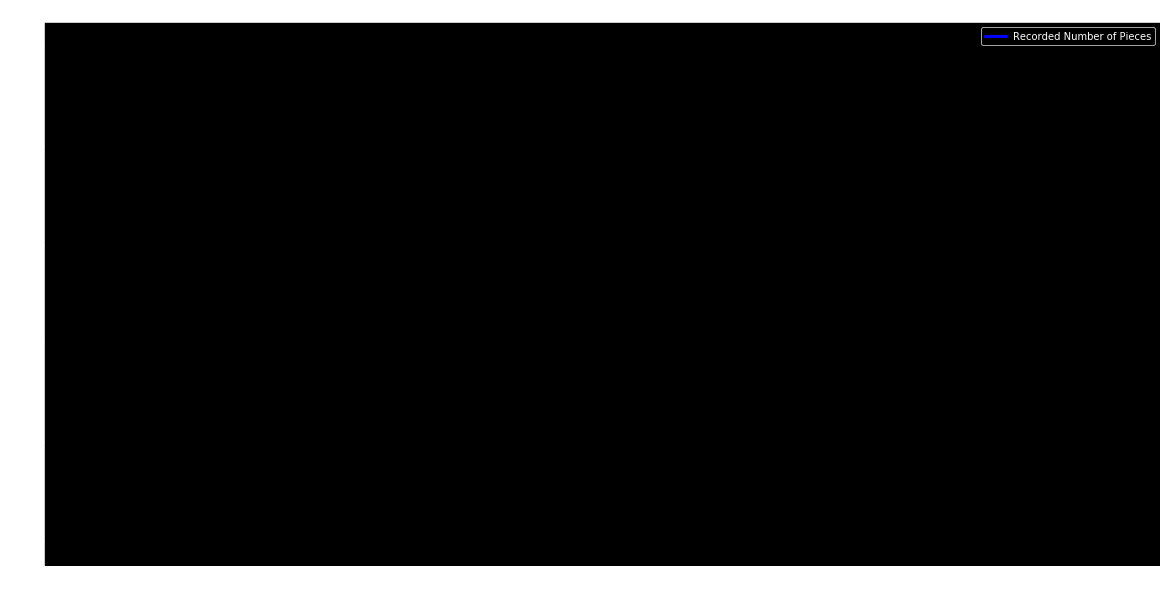

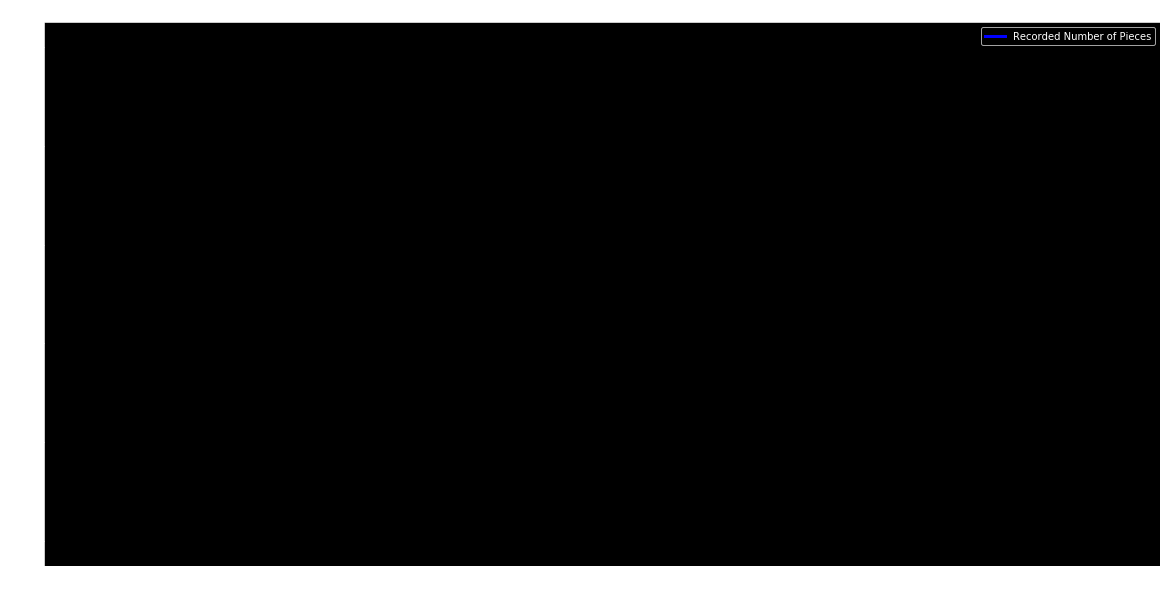

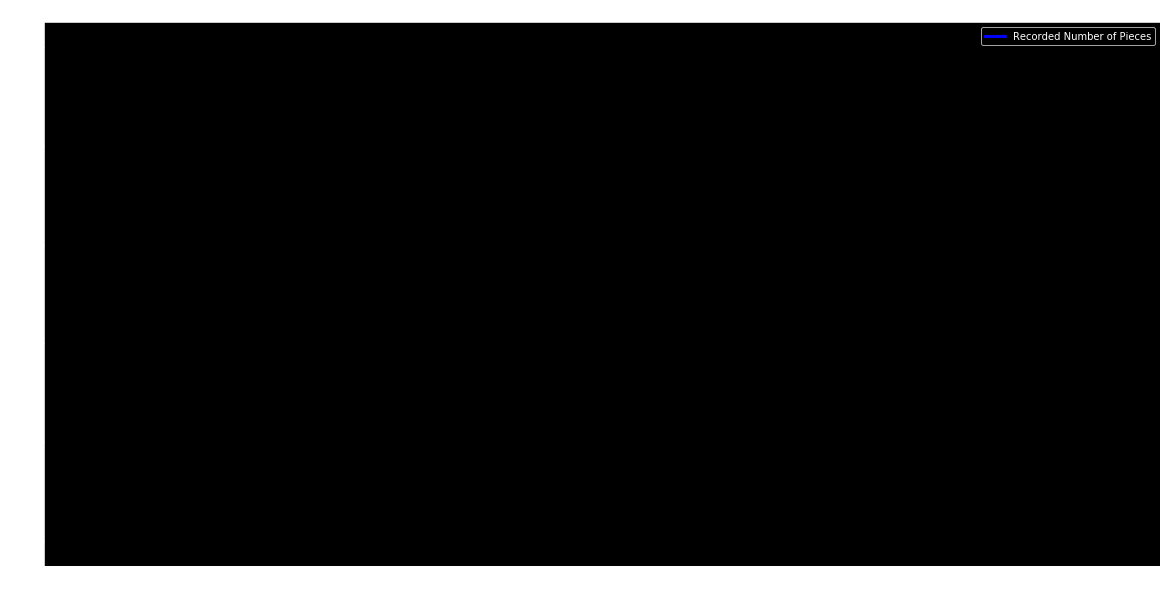

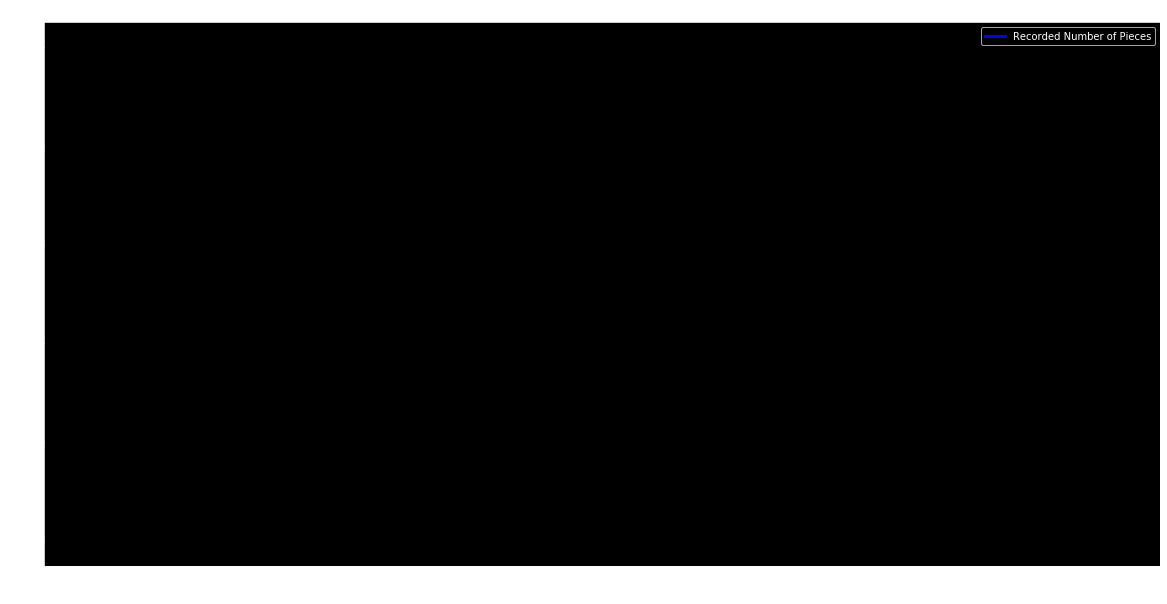

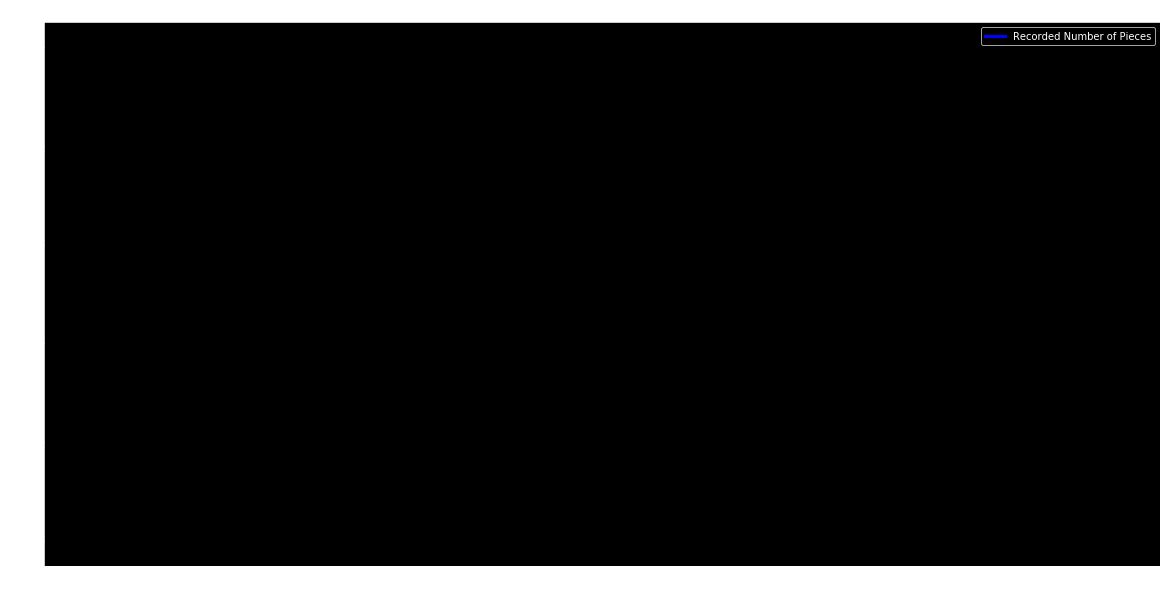

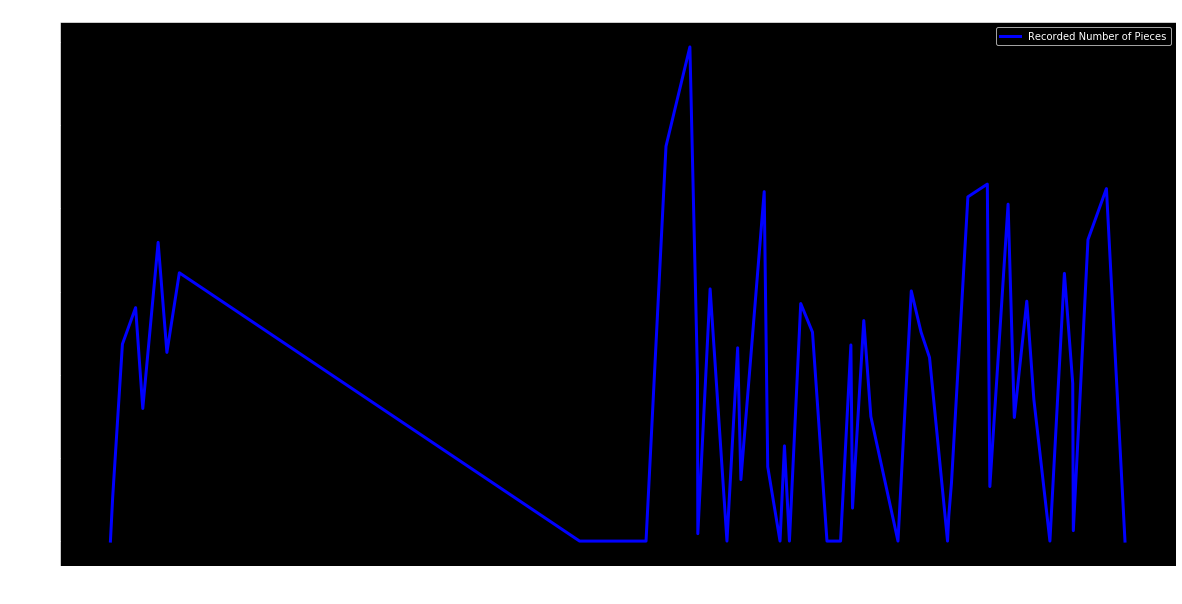

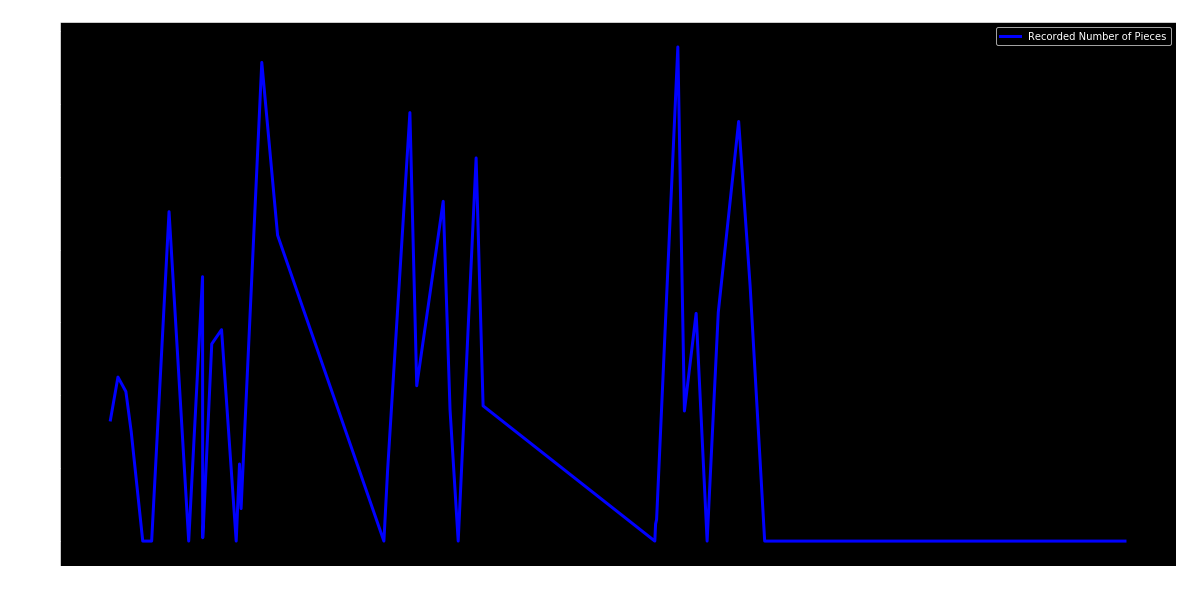

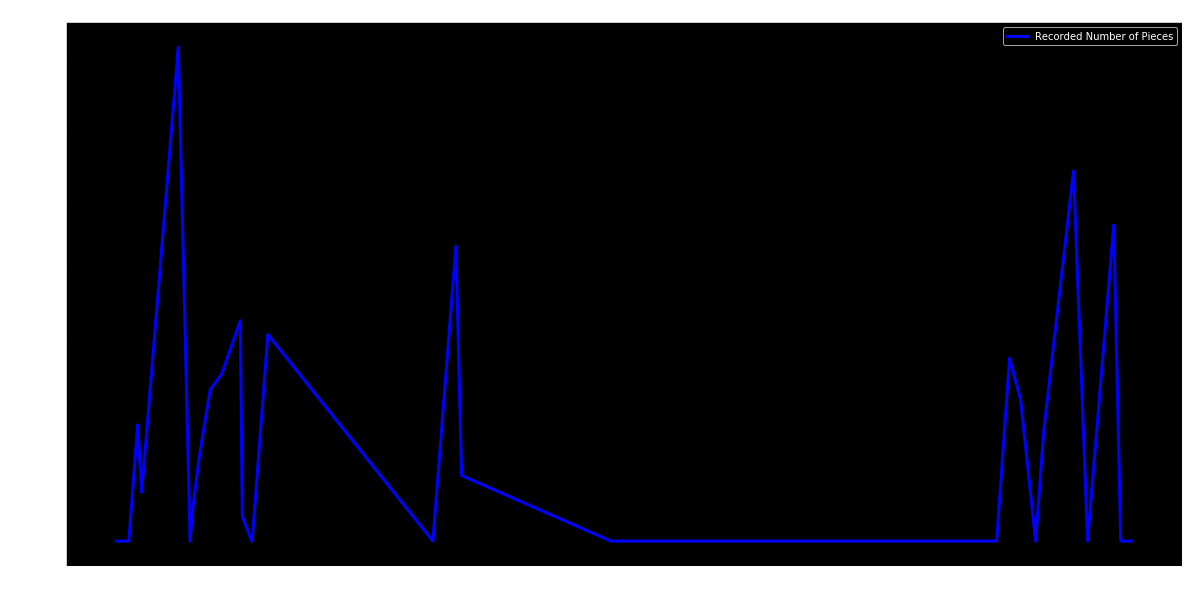

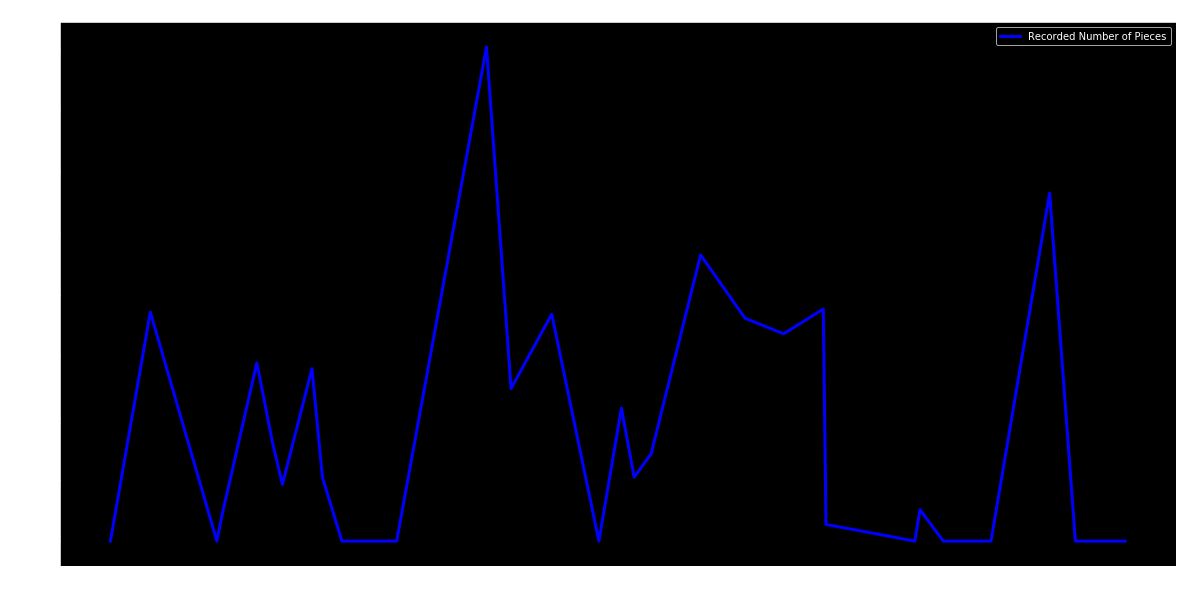

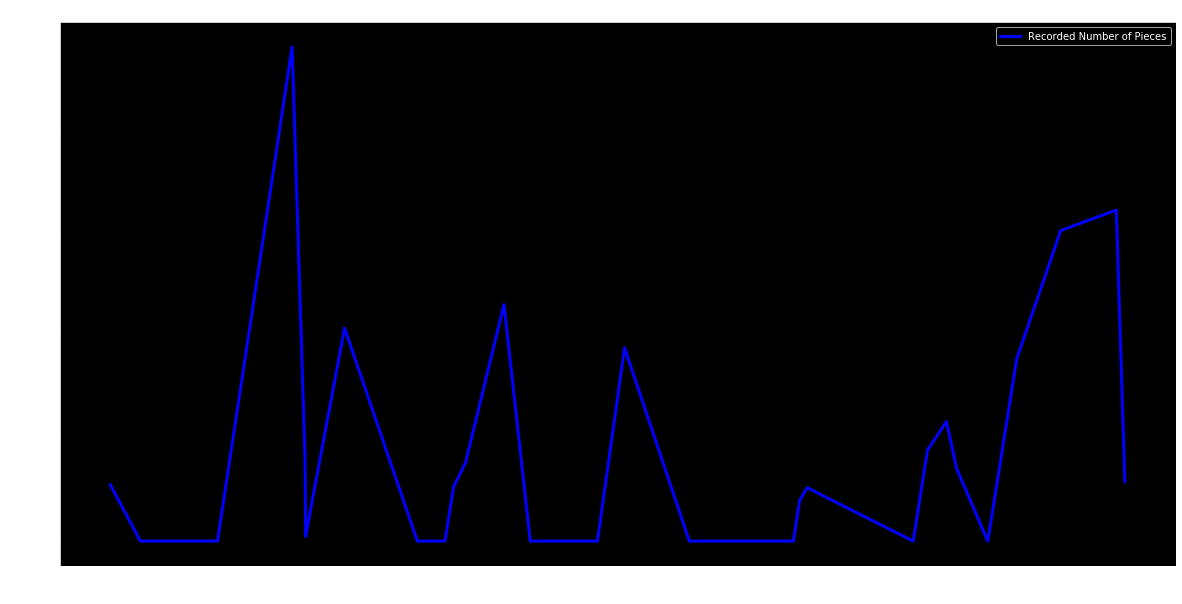

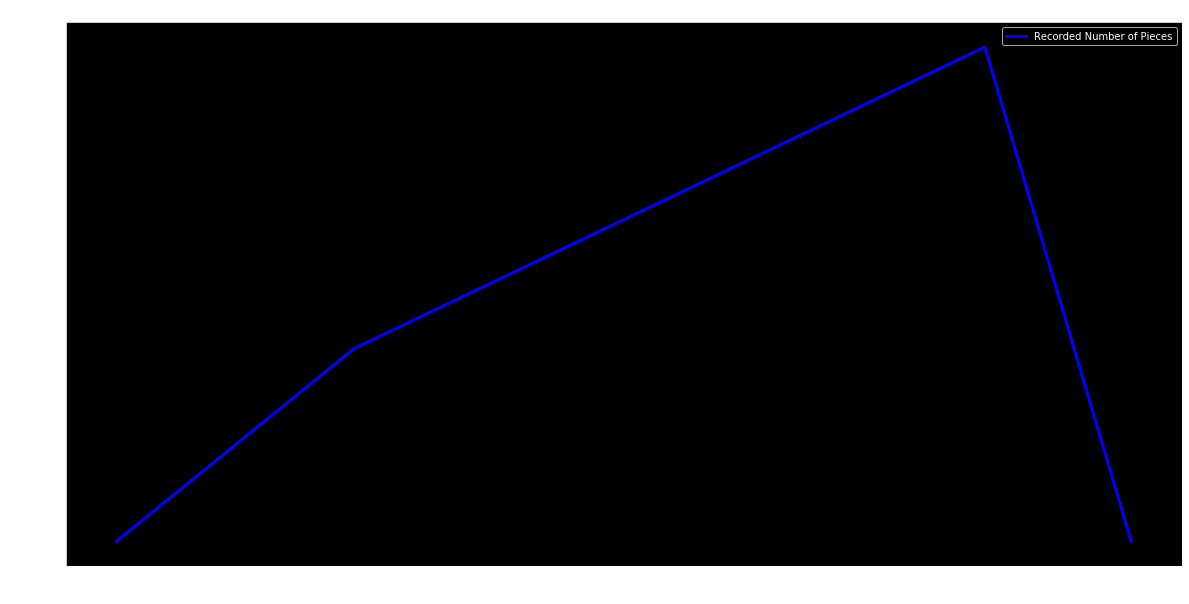

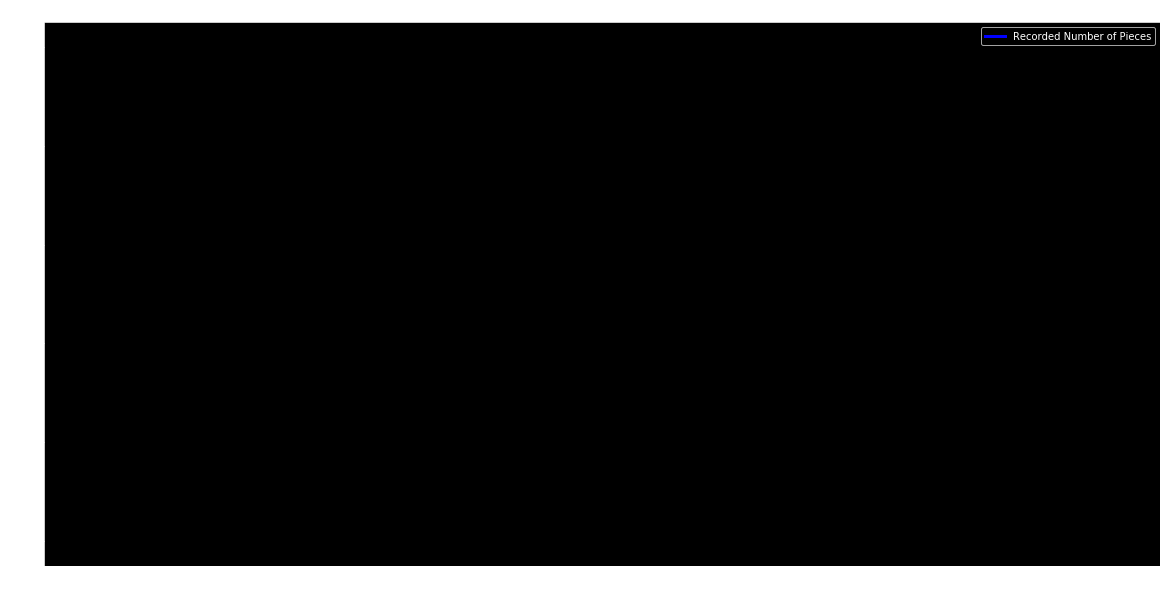

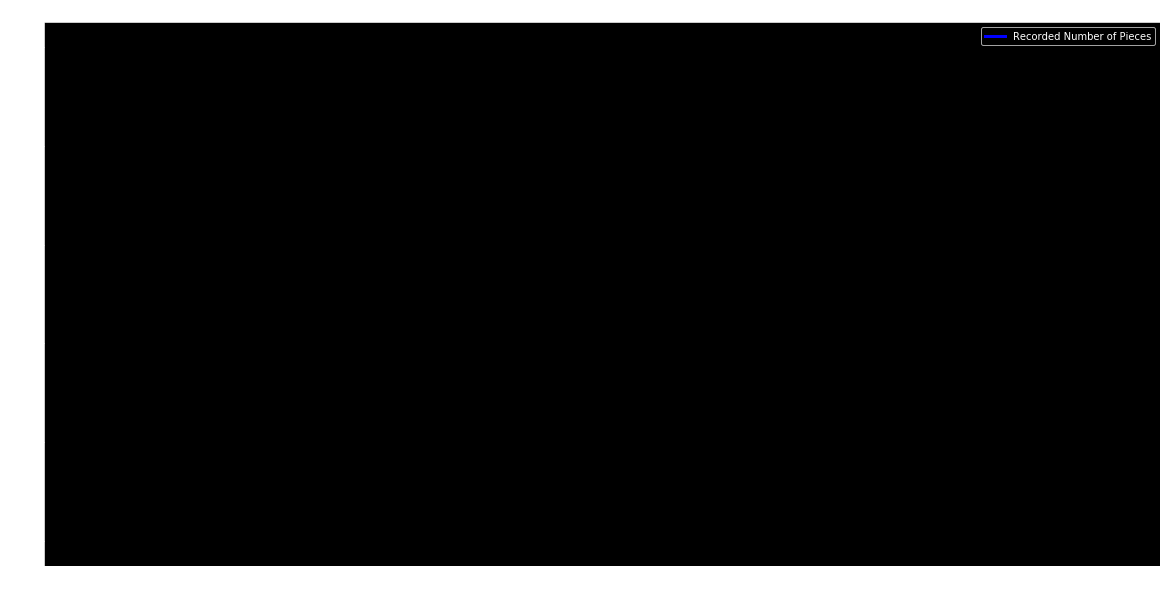

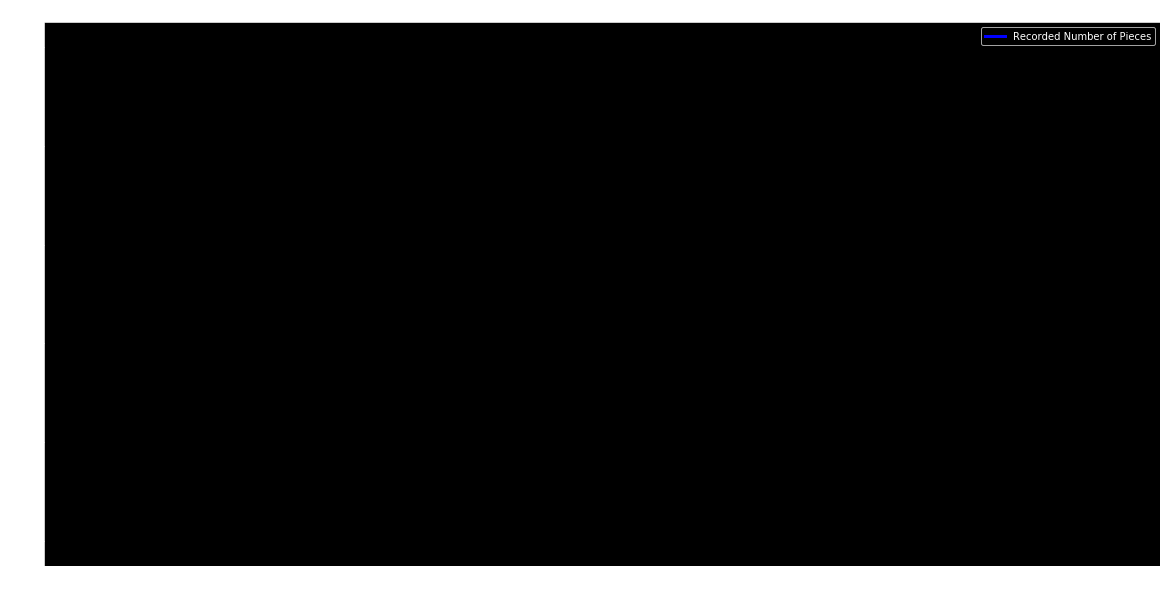

In [6]:
for op in ('Op_1', 'Op_2', 'Op_3', 'Op_4', 'Op_5'):
    for m in ('M1', 'M2'):
        for a in ('P1', 'P2', 'P3'):
            plt.figure(figsize=(20, 10))
            plt.plot(data['Time'][(data['Operator']==op)][(data['Machine']==m)][(data['Part']==a)], data['NumberOfPieces'][(data['Operator']==op)][(data['Machine']==m)][(data['Part']==a)], linewidth=3, linestyle="-", color="blue", label=r"Recorded Number of Pieces")
            plt.xlabel(r"Timestamp")        
            plt.ylabel(r"Number of Pieces")
            plt.title(f"Number of pieces for part {a} produced by operator {op} using machine {m} over a 1-day period")
            plt.legend(loc="upper right")

### Q1. How does Machine M1 compare against M2 in terms of its production capacity?

To answer this question, I will be working with the following assumption: A simple measure for production capacity is the number of items produced per day. 

For this dataset, we have been given data for only one day to simplify calculations.

In [7]:
data.groupby(['Machine'])['NumberOfPieces'].sum()

Machine
M1    3530401
M2    2674122
Name: NumberOfPieces, dtype: int64

From the results shown above, it can be seen that for the same time period of approximately 24 hours, machine `M1` produced 856,279 more parts than machine `M2` meaning machine `M1` was more productive in the time period in question.

In absolute terms machine `M1` has a production capacity of **3,530,401 parts per day** or approximately **147100 parts per hour**.

Machine `M2` has a production capacity of **2,674,122 parts per day** or approximately **111421 parts per hour**.

This can also be clearly seen in the graph below:

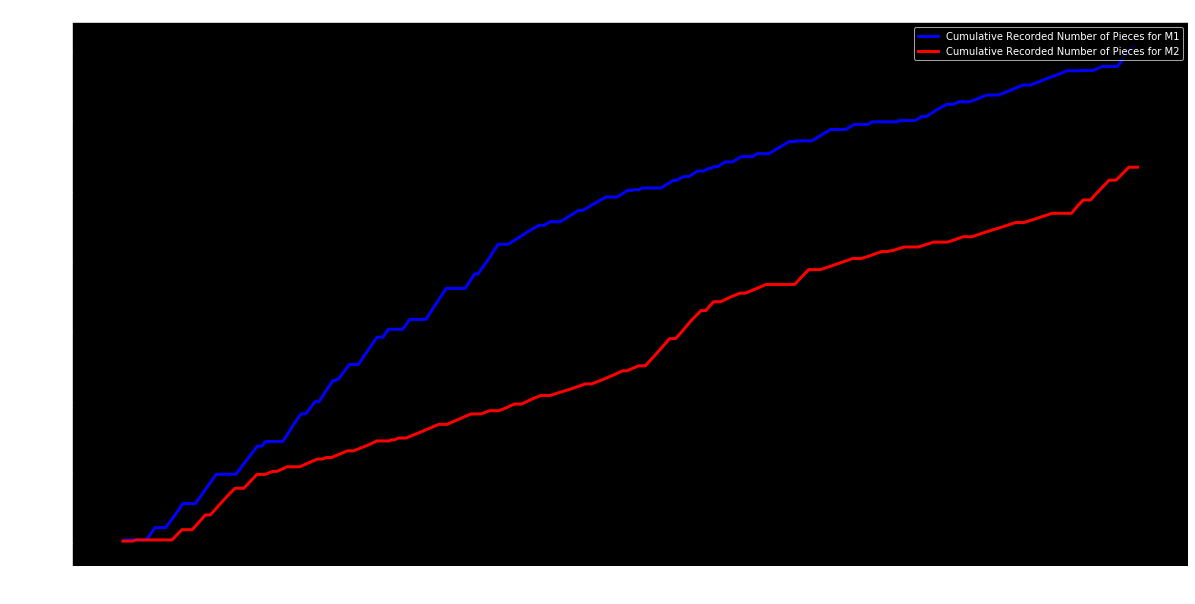

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(data['Time'][(data['Machine']=='M1')], data['NumberOfPieces'][(data['Machine']=='M1')].cumsum(), linewidth=3, linestyle="-", color="blue", label=r"Cumulative Recorded Number of Pieces for M1")
plt.plot(data['Time'][(data['Machine']=='M2')], data['NumberOfPieces'][(data['Machine']=='M2')].cumsum(), linewidth=3, linestyle="-", color="red", label=r"Cumulative Recorded Number of Pieces for M2")
plt.xlabel(r"Timestamp")
plt.ylabel(r"Number of Pieces")  
plt.title(f"Total Number of part-pieces produced by machines M1 and M2 over a 1-day period")
plt.legend(loc="upper right")

### Q2: How do the 3 parts (P1, P2, P3) compare in terms of production complexity, based on this one day's data?

To answer this question, I will be working with the following assumption: the more complex a part is to produce, the lower the quantities of that part that will be produced at the end of the day.

For this dataset, we have been given data for only one day to simplify calculation

In [9]:
data.groupby(['Part'])['NumberOfPieces'].sum()

Part
P1     794559
P2    1810225
P3    3599739
Name: NumberOfPieces, dtype: int64

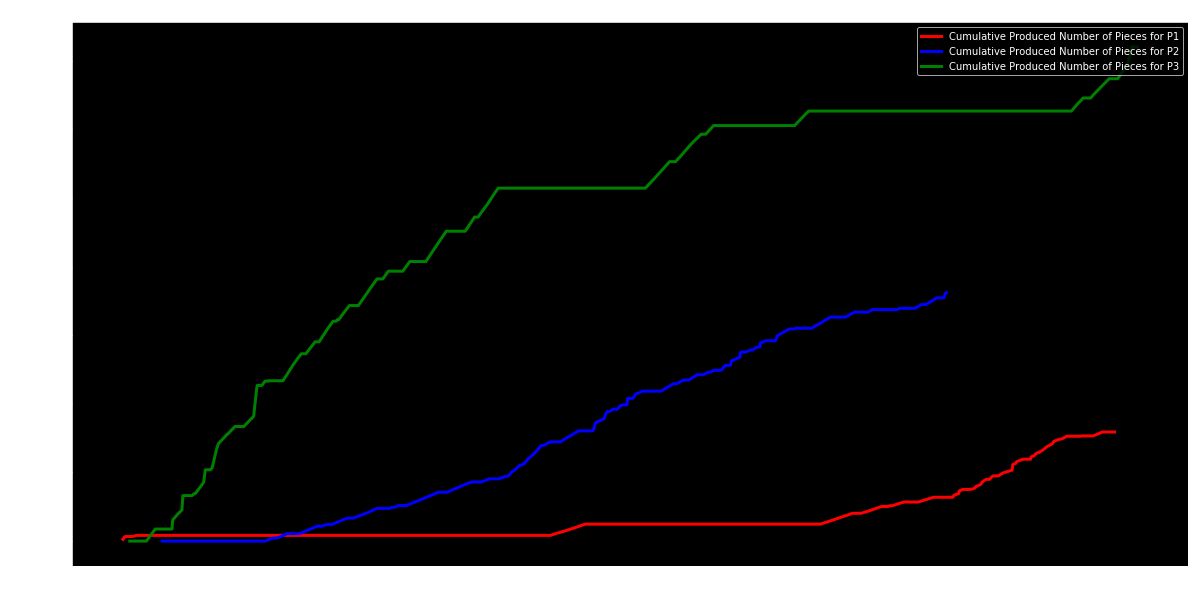

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(data['Time'][(data['Part']=='P1')], data['NumberOfPieces'][(data['Part']=='P1')].cumsum(), linewidth=3, linestyle="-", color="red", label=r"Cumulative Produced Number of Pieces for P1")
plt.plot(data['Time'][(data['Part']=='P2')], data['NumberOfPieces'][(data['Part']=='P2')].cumsum(), linewidth=3, linestyle="-", color="blue", label=r"Cumulative Produced Number of Pieces for P2")
plt.plot(data['Time'][(data['Part']=='P3')], data['NumberOfPieces'][(data['Part']=='P3')].cumsum(), linewidth=3, linestyle="-", color="green", label=r"Cumulative Produced Number of Pieces for P3")
plt.xlabel(r"Timestamp")
plt.ylabel(r"Number of Pieces")  
plt.title(f"Total Number of part-pieces P1, P2, and P3 produced over a 1-day period")
plt.legend(loc="upper right")

From the results shown above, it can be seen that for the same time period of approximately 24 hours, 794,559 items of part `P1`; 1,810,225 items of part `P2`, and 3,599,739 items of part `P3` were produced.1

In line with the initial assumptions postulated, therefore, the approximate order of complexity of the parts is as follows:

**Part P1 is more complex than part P2 which in turn is more complex than part P3.**

### Q3: How do the 5 operators compare, in terms of their individual production rates?

To answer this question, I will be working with the following assumption: the more quantities of parts produced by an operator, the higher his/her production rate (signaling a higher productivity).

For this dataset, we have been given data for only one day to simplify calculation

In [11]:
data.groupby(['Operator'])['NumberOfPieces'].sum()

Operator
Op_1    1811442
Op_2     880750
Op_3    1044542
Op_4    1793372
Op_5     674417
Name: NumberOfPieces, dtype: int64

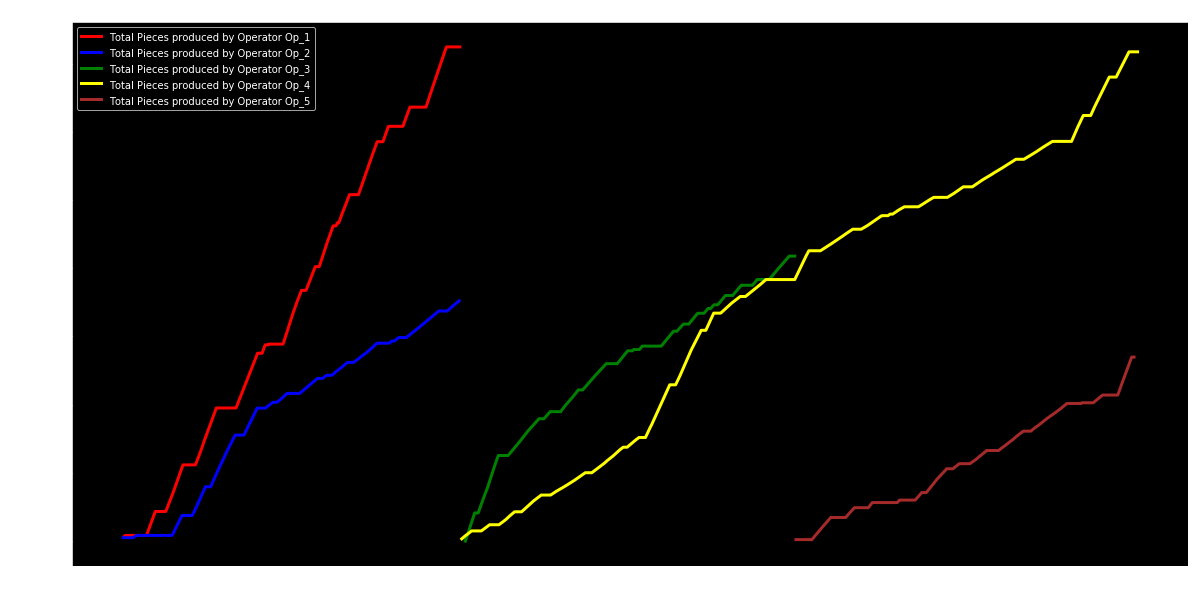

In [12]:
plt.figure(figsize=(20, 10))
color = ('red', 'blue', 'green', 'yellow', 'brown')
OperatorList = ['Op_1', 'Op_2', 'Op_3', 'Op_4', 'Op_5']
i = 0
for op in OperatorList:
    plt.plot(data['Time'][(data['Operator']==op)], data['NumberOfPieces'][(data['Operator']==op)].cumsum(), linewidth=3, linestyle="-", color=color[i], label=f"Total Pieces produced by Operator {op}")
    i += 1
plt.xlabel(r"Timestamp")
plt.ylabel(r"Number of Pieces")  
plt.title(f"Total Number of part-pieces produced by Operators over a 1-day period")
plt.legend(loc="upper left")

Text(0.5, 1.0, 'Bar Chart showing Total Number of part-pieces produced by Operators over a 1-day period')

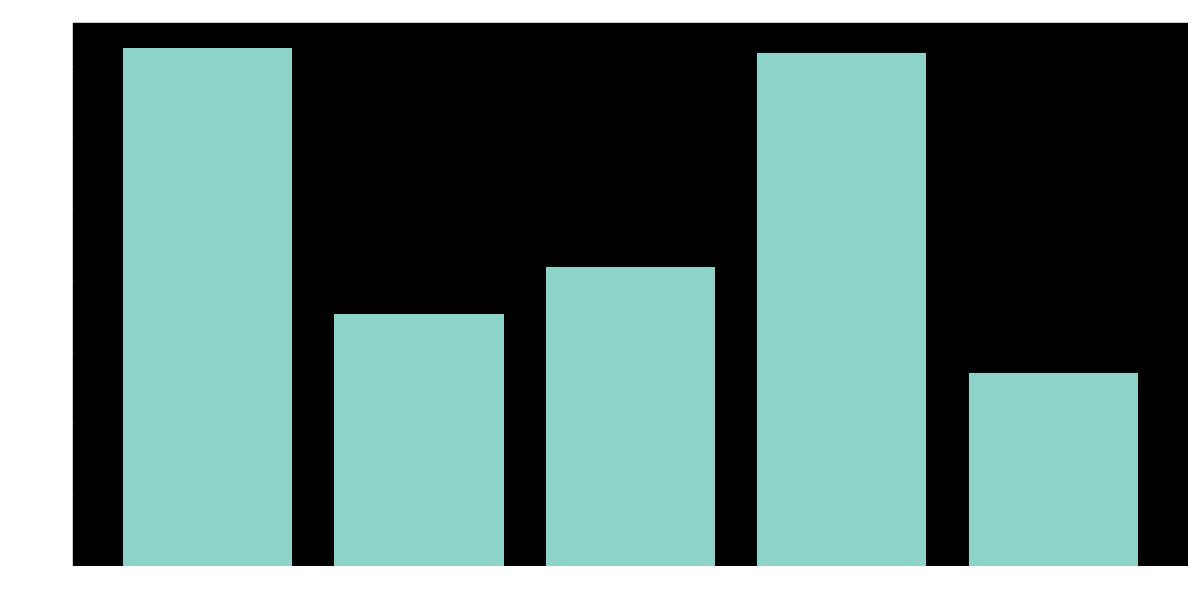

In [13]:
plt.figure(figsize=(20, 10))
OperatorList = ['Op_1', 'Op_2', 'Op_3', 'Op_4', 'Op_5']
pos = np.arange(len(OperatorList))

plt.bar(pos, data.groupby(['Operator'])['NumberOfPieces'].sum())
plt.xticks(pos,OperatorList)

plt.xlabel(r"Operators")
plt.ylabel(r"Total Number of Pieces Produced") 
plt.title(f"Bar Chart showing Total Number of part-pieces produced by Operators over a 1-day period")

From the results shown above, it can be seen that for the same time period of approximately 24 hours, the Operators produced as follows:

Operator 1 produced 1,811,442 items

Operator 4 produced 1,793,372 items

Operator 3 produced 1,044,542 items

Operator 2 produced 880,750 items

Operator 5 produced 674,417 items

In line with the initial assumptions postulated, therefore, the ranking of individual production rate of the Operators is as follows:

**Operator 1 is most productive; followed by Operator 4; followed by Operator 3; followed by Operator 2; and least of all is Operator 5**

### Q4. What is the actual realized production rate, when taking into account all the stoppages?

I had earlier calculated the individual production rate of individual operators to be 1,811,442; 1,793,372; 1,044,542; 880,750; 674,417 items produced by Operators 1, 4, 3, 2 and 5 respectively in 24 hours.

This brings the total production rate for all operators without taking time of stoppages into account to be 6,204,523 items in 24 hours or a production rate of approximately **258,521 items per hour**

However, if I am to account for the stoppages through the same time period, it will be observed that this same 6,204,523 items where actually produced in less than 24 hours since there were some hours of machine/operator downtime.

Getting the actual hours of production employed will give me dividend to use for the actual realized production rate.

To get the actual hours of production employed, I will filter the dataframe for only rows where Number of pieces produced is not 0 and sum up the timedeltas to get the total seconds of actual production, to be later converted to hours.


In [14]:
data['UnixTime'] = data['Time'].astype('int64')//1e9
data['DiffTime'] = data['UnixTime'].diff()
data['DiffTime'] = data['DiffTime'].fillna(value=0)
data.head()

,Time,StopType,Operator,Part,NumberOfPieces,Machine,UnixTime,DiffTime
0,2019-12-01 00:07:29.798441,Run,Op_2,P1,12483,M2,1.575159e+09,0.0
1,2019-12-01 00:09:55.991285,Run,Op_1,P1,18988,M1,1.575159e+09,146.0
2,2019-12-01 00:10:46.491958,Run,Op_1,P1,1793,M1,1.575159e+09,51.0
3,2019-12-01 00:17:12.460362,ChangeOver,Op_1,P3,0,M1,1.575159e+09,386.0
4,2019-12-01 00:21:34.147366,OpStop,Op_2,P1,0,M2,1.575160e+09,262.0


In [15]:
time_seconds = data['DiffTime'][data['NumberOfPieces']!=0].sum()
time_hours = time_seconds/(3600)
print(f'The actual time of production is {time_hours: .2f} hours')

The actual time of production is  14.82 hours


From the result above, it can be seen that the actual time of production is 14.82 hours

In line with this, the actual realized production rate for all operators taking into account the time of stoppages is 6,204,523 items in 14.82 hours or an actual realized production rate of approximately **418,658 items per hour** as compared to the previous calculation of *258,521 items per hour*